<div align="center">
  <h1>Conflicting updates (GPT2-XL) - Results reported in the paper </h1>
</div>


<div align="center">
<img src="../figs/dissonant_experiment.png" alt="Overview of our experimental pipeline" width="1000" height="auto" style="background-color: white;">
</div>

### As discussed in the paper, to reach the same regime as gpt2small, we need to be able to pack new conflicting knowledge inside gpt2XL. This turns out to be more challening, needing for example to increase the number of neurons (hence giving more space to incorporate new knowledge). This is illustrated below. 

#### Please check `plots_exp_3_1_xl__Addendum_LR_impact_illustration.ipynb` for illustrations with more parameters (e.g. lower LRs, lower number of facts).


In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys
# path insertion
sys.path.append(os.path.abspath('..'))

import utils 
importlib.reload(utils)
from utils import *

from retained_plots import plot_editing_old_new_general_noLoRa

In [2]:
strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd']
experiment_name = 'experiment3_1_xl'
filepath = '../experiments/gpt2-xl/experiment_3_1/'

In [3]:
!ls ../experiments/gpt2-xl/experiment_3_1/*small*

../experiments/gpt2-xl/experiment_3_1/experiment_3_1_20240719_085748_20000_1000_10_small_lr.json
../experiments/gpt2-xl/experiment_3_1/experiment_3_1_20240719_135003_2000_1000_10_small_lr.json


# 1.  GPT2XL (from 2k to 20k neurons with lr=1e-4): 
## Despite difficulty to ingest new knowledge, Old knowledge is considerably destroyed

<h3> Experiment parameters (bs 32) </h3>

| Knowledge | Dataset name  | Strategy | LR | epochs | Neuron-Range | 
|:---------:|:------------:|:--------:|:---:|:------:|:------------:|
| *Old Facts* | Dataset A | Full Finetuning | `0.0001`  | 10| NA |
| *New Facts* | Dataset B | Full Finetuning | `0.0001`  | 10  | NA |
| *Conflicting* | Dataset NotB | Full Finetuning + LoRa | `0.0001` | 10 | NA |
| *Conflicting* | Dataset NotB | Targeted Strategies | `0.0001` | 10 | **2k-20k** |

```bash
accelerate launch experiments_scripts/exp_3_1_xl.py --config configs/gpt2-xl_experiment3_1_2000_1000_10_small_lr.yml
```


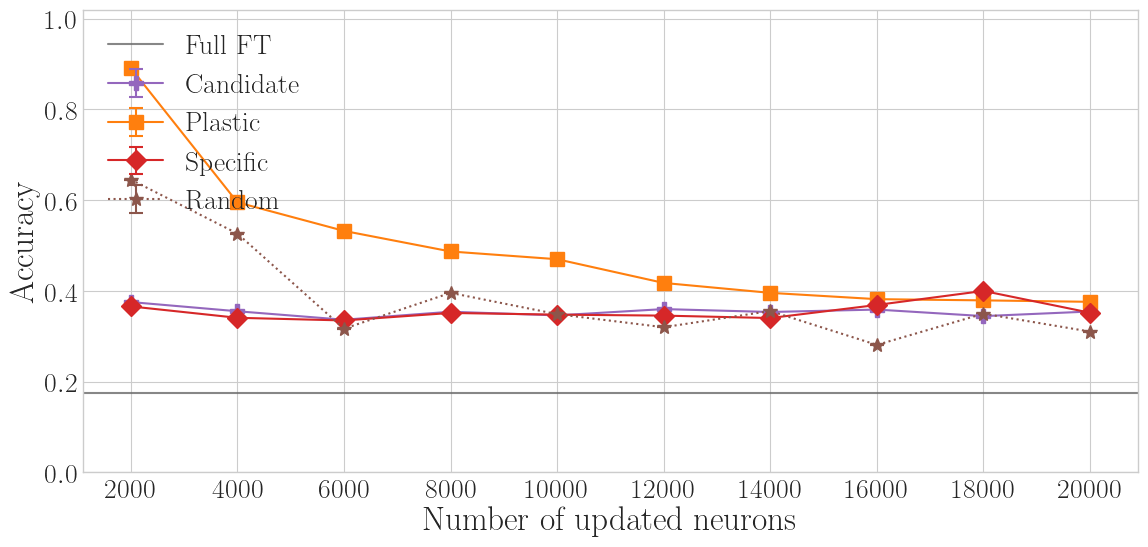

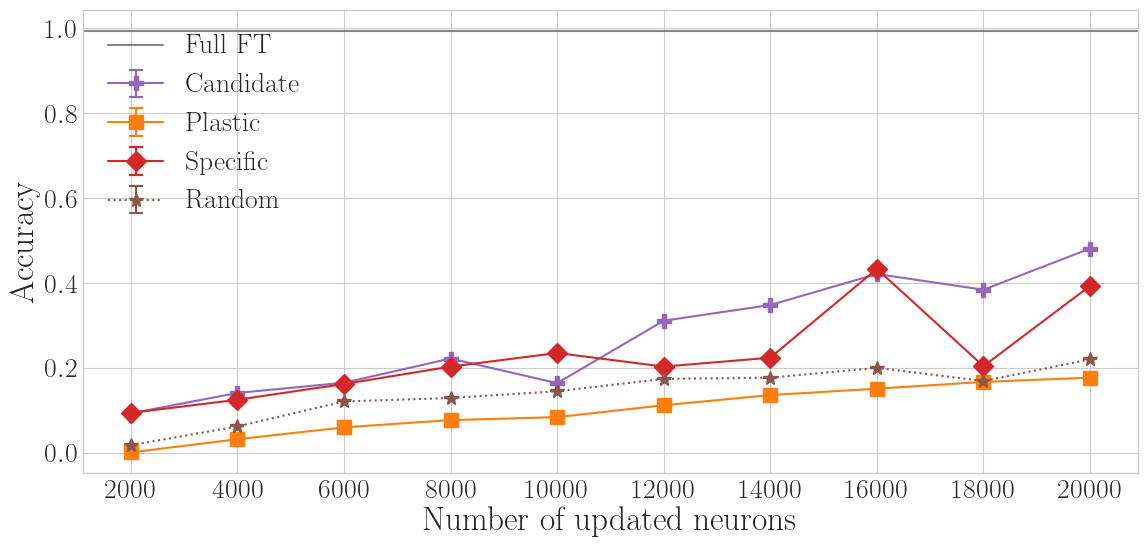

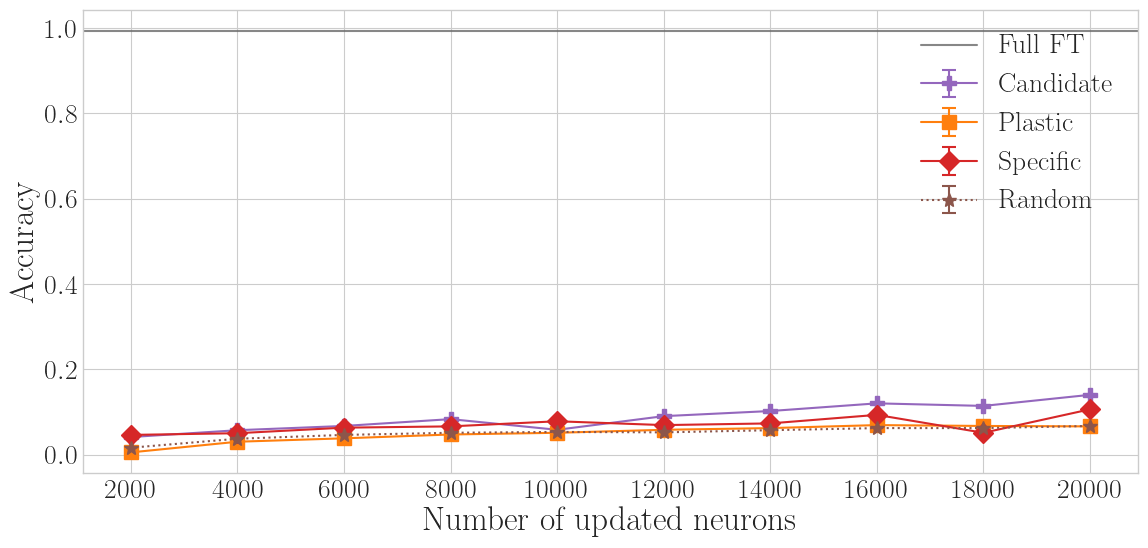

In [4]:
strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd']
# Experiment 3 (N_SAMPLES = 1000)
filename = 'experiment_3_1_20240719_135003_2000_1000_10_small_lr.json'
loc_old_3 = 'upper left'
bbox_old_3 = (0, 1)
loc_new_3 = 'lower right'
bbox_new_3 = (1, 0)
loc_gen_1 = 'upper right'
bbox_gen_1 = (1, 1)
y_lim_old_1_3 = 0
y_lim_old_2_3 = 1.02

plot_editing_old_new_general_noLoRa(experiment_name, filename, filepath, strategies, 
                             loc_old_3, bbox_old_3, loc_old_3, bbox_old_3, loc_gen_1, bbox_gen_1,
                             y_lim_old_1_3, y_lim_old_2_3)

## 2. 10X more neurons (to pack new conflicting knowledge successfully)

<h3> Experiment parameters (bs 32) </h3>

| Knowledge | Dataset name  | Strategy | LR | epochs | Neuron-Range | 
|:---------:|:------------:|:--------:|:---:|:------:|:------------:|
| *Old Facts* | Dataset A | Full Finetuning | `0.0001`  | 10| NA |
| *New Facts* | Dataset B | Full Finetuning | `0.0001`  | 10  | NA |
| *Conflicting* | Dataset NotB | Full Finetuning + LoRa | `0.0001` | 10 | NA |
| *Conflicting* | Dataset NotB | Targeted Strategies | `0.0001` | 10 | **20k-200k** |

```bash
accelerate launch experiments_scripts/exp_3_1_xl.py --config configs/gpt2-xl_experiment3_1_20000_1000_10_small_lr.yml
```


## 

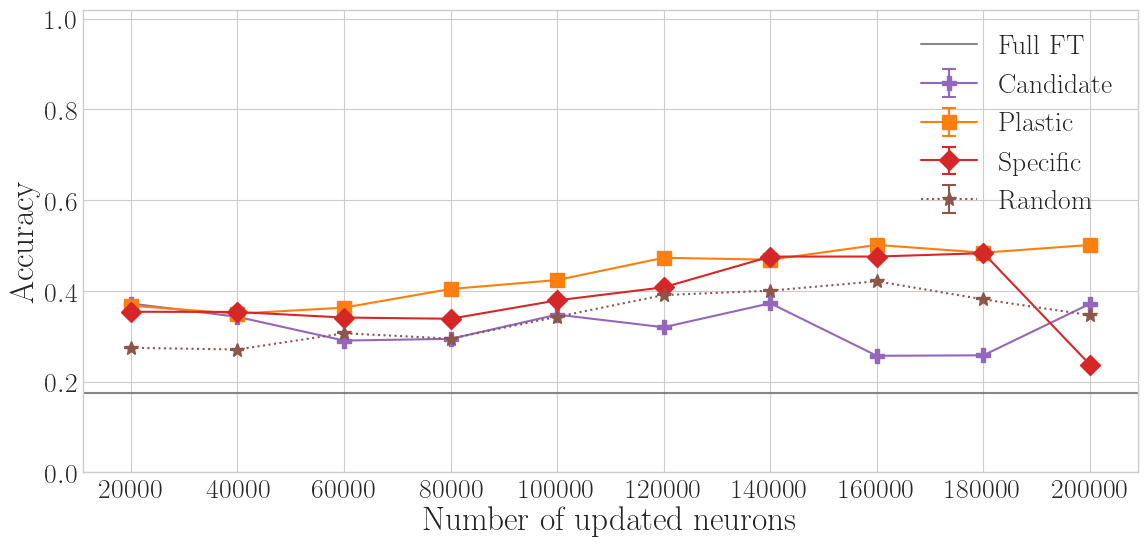

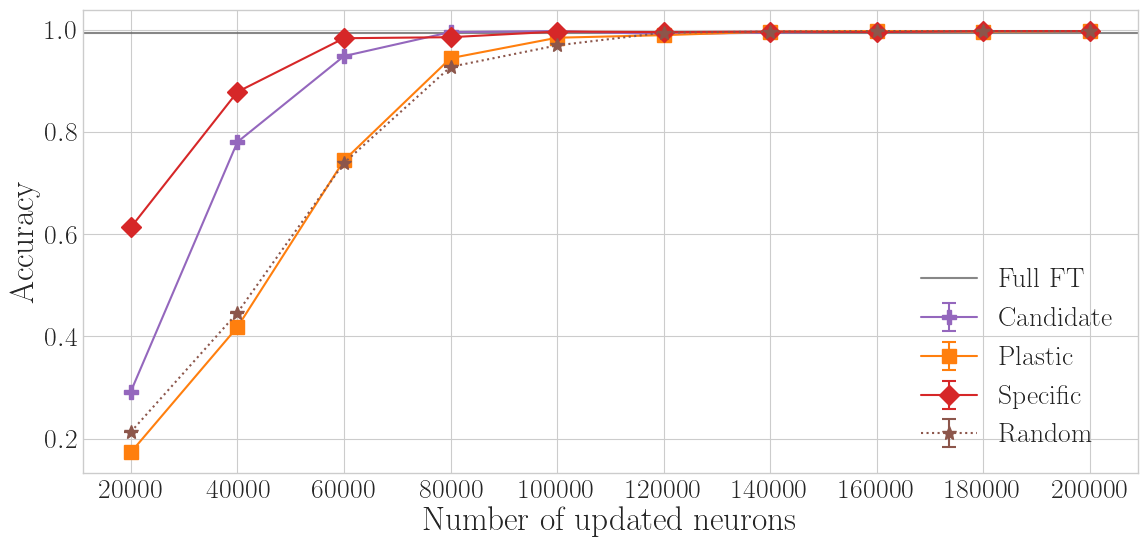

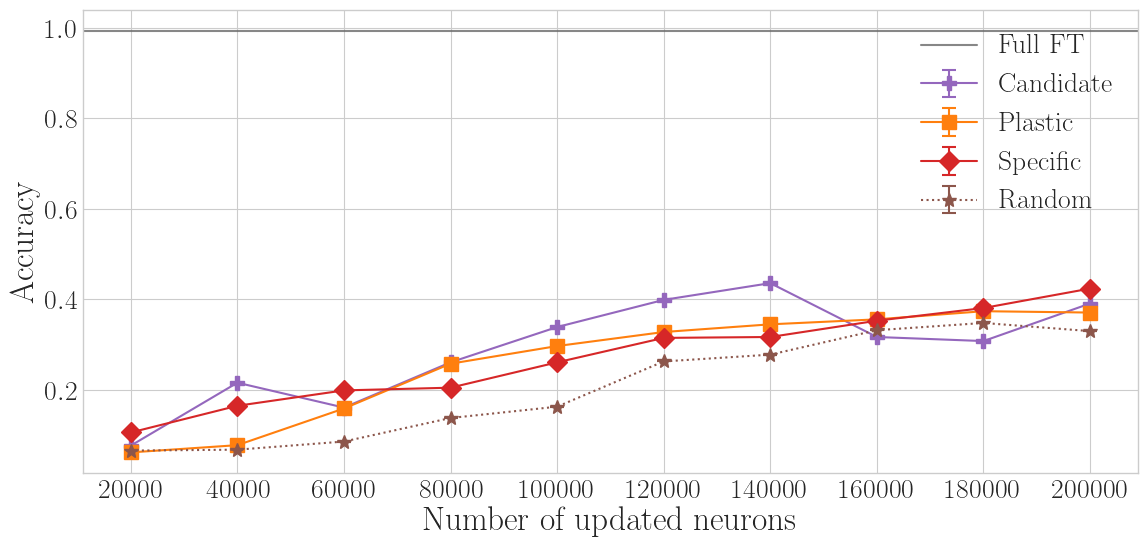

In [6]:
filename = 'experiment_3_1_20240719_085748_20000_1000_10_small_lr.json'
# Experiment 3 (N_SAMPLES = 1000)
loc_old_3 = 'upper right'
bbox_old_3 = (1, 1)
loc_new_3 = 'lower right'
bbox_new_3 = (1, 0)
loc_gen_1 = 'upper right'
bbox_gen_1 = (1, 1)
y_lim_old_1_3 = 0
y_lim_old_2_3 = 1.02

plot_editing_old_new_general_noLoRa(experiment_name, filename, filepath, strategies, 
                             loc_old_3, bbox_old_3, loc_new_3, bbox_new_3, loc_gen_1, bbox_gen_1,
                             y_lim_old_1_3, y_lim_old_2_3)